# Step 3. Baseline Model

[//]: # (TODO: Write methodology and observations here)

In [1]:
# Imports and environmental setups

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Custom utils functions
from utils import dataset
from utils.visualization import plot_learning_curve
from utils.visualization import visualize_predictions


plt.style.use('ggplot')
dataset_dir = '../data/processed/'

## 3.1. Load Dataset

In [2]:
df = dataset.load(dataset_dir)

class_encoder = LabelEncoder()
class_encoder.fit(df['Class'])
df['Class'] = class_encoder.transform(df['Class'])

In [3]:
class_encoder.classes_

array(['Baby', 'Calimerio', 'Chrysanthemum', 'Hydrangeas', 'Lisianthus',
       'Pingpong', 'Rosy', 'Tana'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16344 entries, 0 to 16343
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ImgPath       16344 non-null  object 
 1   FileType      16344 non-null  object 
 2   Width         16344 non-null  int64  
 3   Height        16344 non-null  int64  
 4   Ratio         16344 non-null  float64
 5   Mode          16344 non-null  object 
 6   Bands         16344 non-null  object 
 7   Transparency  16344 non-null  bool   
 8   Animated      16344 non-null  bool   
 9   Class         16344 non-null  int32  
dtypes: bool(2), float64(1), int32(1), int64(2), object(4)
memory usage: 989.7+ KB


In [5]:
df.sample(n=42, random_state=42)

,ImgPath,FileType,Width,Height,Ratio,Mode,Bands,Transparency,Animated,Class
15728,Tana/tana_105.jpg,jpg,512,512,1.0,RGB,R G B,False,False,7
10549,Pingpong/000279.jpg,jpg,512,512,1.0,RGB,R G B,False,False,5
476,Baby/000477.jpg,jpg,512,512,1.0,RGB,R G B,False,False,0
13796,Rosy/001504.jpg,jpg,512,512,1.0,RGB,R G B,False,False,6
9416,Lisianthus/lisianthus_201.jpg,jpg,512,512,1.0,RGB,R G B,False,False,4
10843,Pingpong/000573.jpg,jpg,512,512,1.0,RGB,R G B,False,False,5
12634,Rosy/000342.jpg,jpg,512,512,1.0,RGB,R G B,False,False,6
11220,Pingpong/000950.jpg,jpg,512,512,1.0,RGB,R G B,False,False,5
15794,Tana/tana_165.jpg,jpg,512,512,1.0,RGB,R G B,False,False,7
4526,Chrysanthemum/000446.jpg,jpg,512,512,1.0,RGB,R G B,False,False,2


In [6]:
train, test = train_test_split(df, shuffle=True, test_size=0.2, random_state=42)
train, val = train_test_split(train, shuffle=True, test_size=0.25, random_state=42)

print(f'Train data: {train.shape[0]} samples, Validation Data: {val.shape[0]} samples, Test Data: {test.shape[0]} samples.')

Train data: 9806 samples, Validation Data: 3269 samples, Test Data: 3269 samples.


## 3.2. Baseline Model Setup and Training

### 3.2.1. Baseline Parameters

In [7]:
# Model Parameters
IMG_SIZE = 256
BATCH_SIZE = 128
INPUT_DIM = (IMG_SIZE, IMG_SIZE, 3)
HIDDEN_LAYER_DIM = 128
OUTPUT_CLASSES = 1  # Label encoded: sparse label output as a single integer

# Training Parameters
EPOCHS = 24
LEARNING_RATE = 1e-3

### 3.2.2. Model Setup

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 128)               25165952  
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,215,617
Trainable params: 25,215,617
No

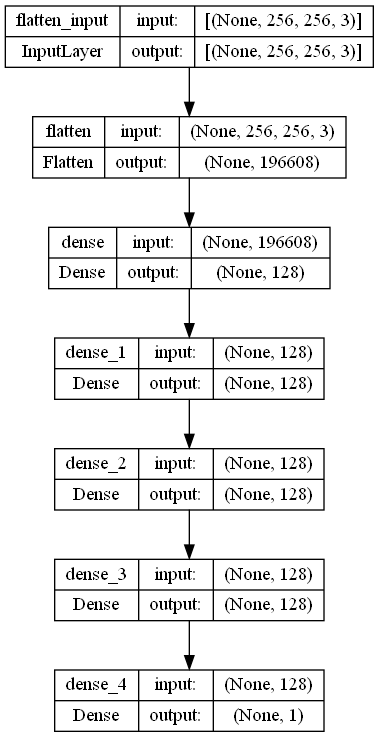

In [9]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file='images/BaselineModel-Diagram.png')

### 3.2.3. Training

In [10]:
train['Class'] = train['Class'].astype('str')
train_datagen = ImageDataGenerator(data_format='channels_last')
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=dataset_dir,
    x_col='ImgPath',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    seed=42
)

val['Class'] = val['Class'].astype('str')
val_datagen = ImageDataGenerator(data_format='channels_last')
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val,
    directory=dataset_dir,
    x_col='ImgPath',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    seed=42
)

Found 9806 validated image filenames belonging to 8 classes.
Found 3269 validated image filenames belonging to 8 classes.


In [11]:
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['sparse_categorical_accuracy']
)

history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS, verbose=0)

InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\vomin\scoop\apps\python\current\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\vomin\scoop\apps\python\current\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\vomin\scoop\apps\python\current\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\vomin\AppData\Local\Temp\ipykernel_28544\3710190369.py", line 7, in <module>
      history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS, verbose=0)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\keras\losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\vomin\Projects\rmit\cosc2753\rmit2023a-cosc2753-assignment2\venv\Lib\site-packages\keras\backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 7 which is outside the valid range of [0, 1).  Label values: 5 1 5 2 6 5 1 4 1 1 4 2 0 3 5 0 1 7 2 7 0 6 4 5 0 7 7 3 4 3 4 6 3 7 4 0 2 0 0 1 3 6 6 4 3 5 5 0 5 0 0 5 2 6 2 1 4 0 3 6 1 1 7 0 7 4 1 2 7 0 6 0 5 4 5 2 0 5 3 2 3 0 7 0 5 7 1 3 3 3 2 7 7 1 7 7 2 1 6 4 3 2 3 0 6 3 1 7 7 2 3 5 0 5 2 0 2 3 5 2 6 3 5 4 6 2 2 6
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1410]

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['categorical_accuracy'],
    history.history['val_categorical_accuracy'],
    to_file='images/BaselineModel-LearningCurve.png'
)

## 3.3. Baseline Model Performance

In [ ]:
test['Class'] = test['Class'].astype('str')
test_datagen = ImageDataGenerator(data_format='channels_last')
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    directory=dataset_dir,
    x_col='ImgPath',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='sparse',
    seed=42
)

model.evaluate(test_generator)

In [ ]:
visualize_predictions(class_encoder, model, test_generator, to_file='images/BaselineModel-SamplePredictions.png')